# Important installations

In [2]:
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install pyclustering


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA 
from scipy.cluster.hierarchy import dendrogram, linkage
import os

In [4]:
if not os.path.isfile("diabetes.csv"):
    print("File does not exist.")
else:
    # Load the dataset
    data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# duplicate dataset for cleaning to remove rows with zero value in Glucose, BloodPressure, SkinThickness, Insulin, BMI
df = data.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','BMI']] = df[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)
df = df.dropna() 
df.shape[0]

532

**Analysis of Pregnancies:**

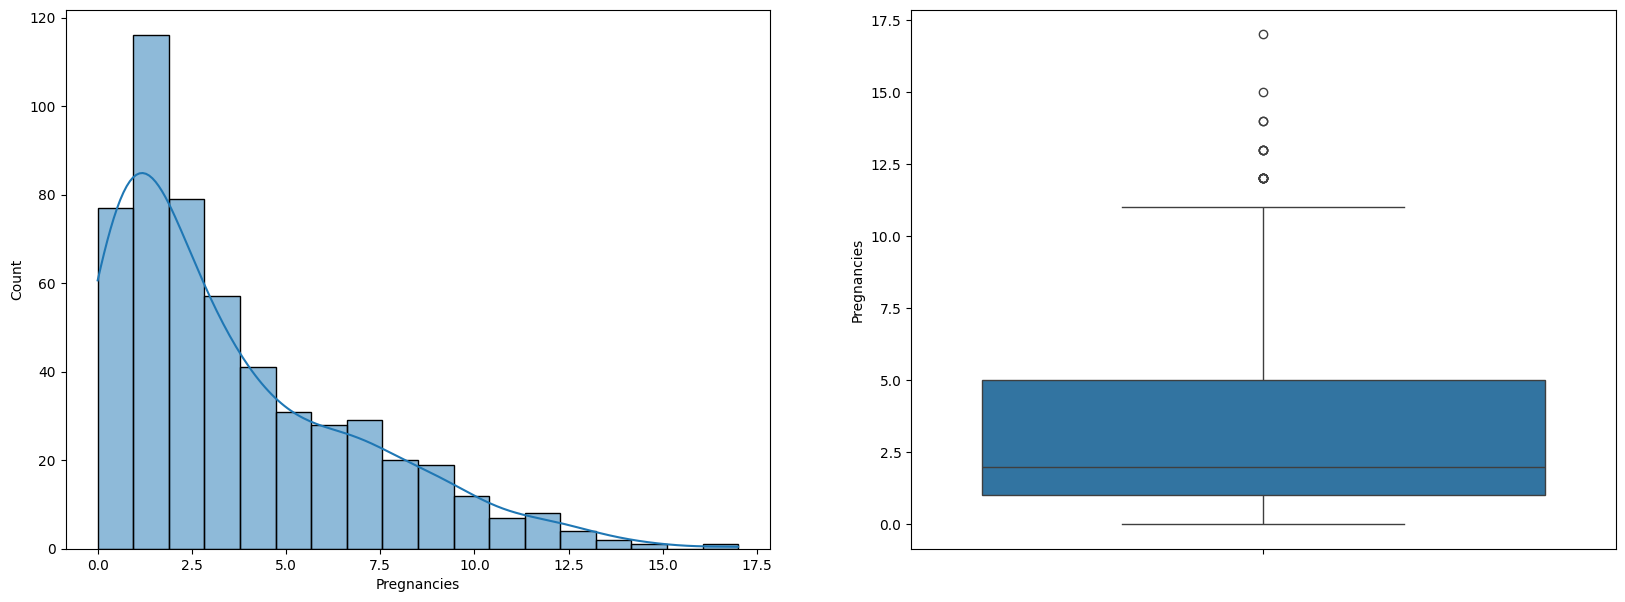

In [41]:
_, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(data=df, x="Pregnancies", ax=ax[0], kde=True)
sns.boxplot(data=df, y="Pregnancies", ax=ax[1]) 
plt.show()

In [11]:
print(
    f"""
    Median of Pregnancies: {df['Pregnancies'].median()}
    Most Women has number of Pregnancies equals: {df['Pregnancies'].mode()[0]} and their sum is {df[df['Pregnancies'] == 1].shape[0]}
    Maximum number of Pregnancies: {df['Pregnancies'].max()}
"""
)


    Median of Pregnancies: 2.0
    Most Women has number of Pregnancies equals: 1 and their sum is 116
    Maximum number of Pregnancies: 17



In [12]:
pregnancies_series = df['Pregnancies'].value_counts()
for freq, num in pregnancies_series.items():
    print(f"women who had {freq} pregnancies are: {num}")

women who had 1 pregnancies are: 116
women who had 2 pregnancies are: 79
women who had 0 pregnancies are: 77
women who had 3 pregnancies are: 57
women who had 4 pregnancies are: 41
women who had 5 pregnancies are: 31
women who had 7 pregnancies are: 29
women who had 6 pregnancies are: 28
women who had 8 pregnancies are: 20
women who had 9 pregnancies are: 19
women who had 10 pregnancies are: 12
women who had 12 pregnancies are: 8
women who had 11 pregnancies are: 7
women who had 13 pregnancies are: 4
women who had 14 pregnancies are: 2
women who had 15 pregnancies are: 1
women who had 17 pregnancies are: 1


**Analysis of Glucose:**

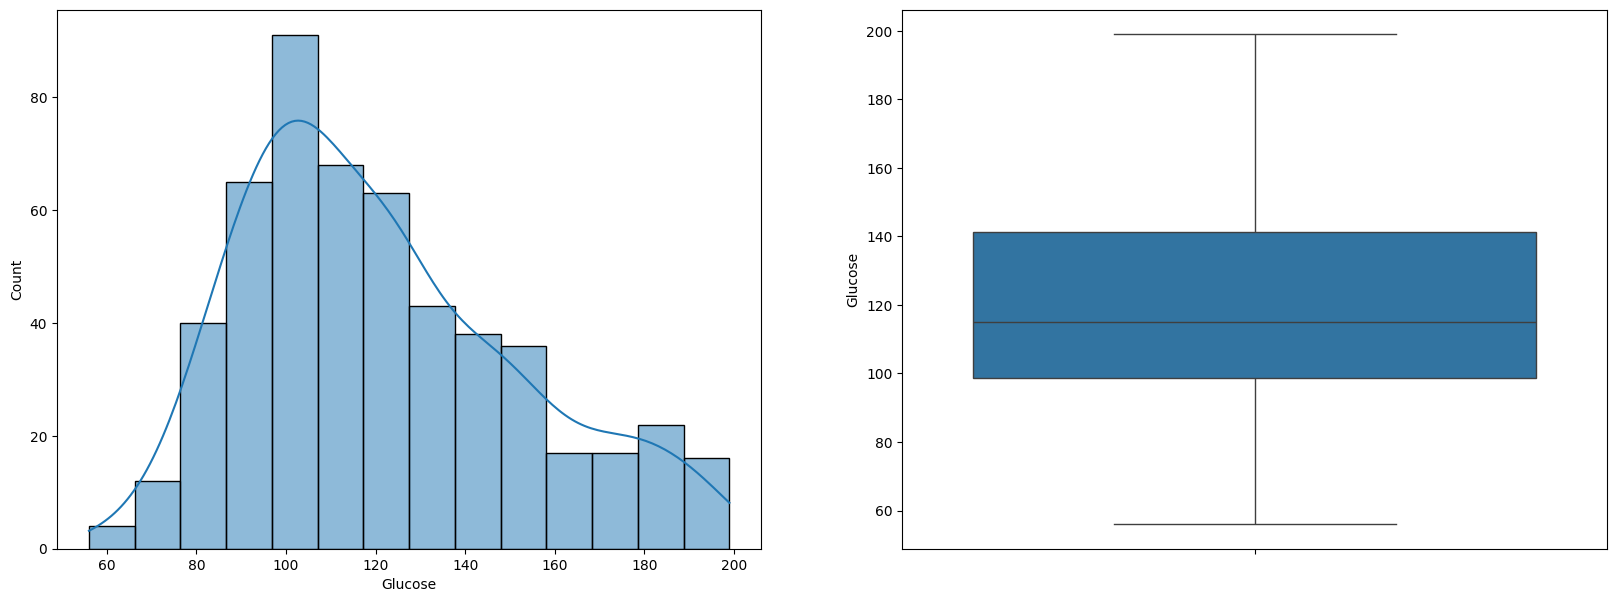

In [13]:
_, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(data=df, x='Glucose', kde=True, ax=ax[0])
sns.boxplot(data=df, y='Glucose', ax=ax[1], orient='v')
plt.show()

In [14]:
print(
    f"""
    Mean of Glucose: {df['Glucose'].mean()}
    Median of Glucose: {df['Glucose'].median()}
    Maximum of Glucose: {df['Glucose'].max()}
    Minimum of Glucose: {df['Glucose'].min()}
"""
)


    Mean of Glucose: 121.03007518796993
    Median of Glucose: 115.0
    Maximum of Glucose: 199.0
    Minimum of Glucose: 56.0



In [15]:
# outliers of Glucose 
print(f"Women with Glucose 0: {df[df['Glucose'] == 0].shape[0]}")


Women with Glucose 0: 0


**Analysis of Blood Pressure:**

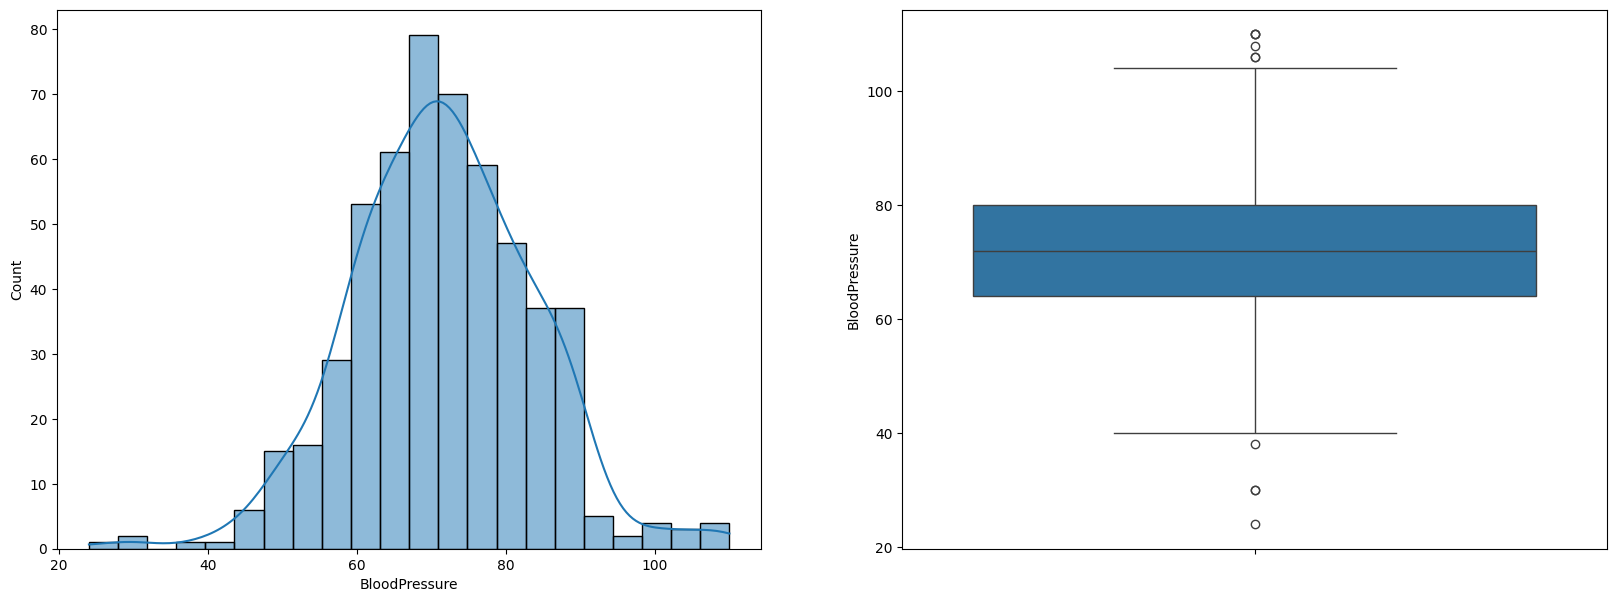

In [16]:
_, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(data=df, x='BloodPressure', kde=True, ax=ax[0])
sns.boxplot(data=df, y='BloodPressure', ax=ax[1], orient='v')
plt.show()

In [17]:
print(
    f"""
    Mean of Blood Pressure: {df['BloodPressure'].mean()}
    Median of Blood Pressure: {df['BloodPressure'].median()}
    Maximum of Blood Pressure: {df['BloodPressure'].max()}
    Minimum of Blood Pressure: {df['BloodPressure'].min()}
"""
)


    Mean of Blood Pressure: 71.50563909774436
    Median of Blood Pressure: 72.0
    Maximum of Blood Pressure: 110.0
    Minimum of Blood Pressure: 24.0



In [18]:
# outliers of Blood Pressure 
print(f"Women with Blood Pressure 0: {df[df['BloodPressure'] == 0].shape[0]}")

Women with Blood Pressure 0: 0


**Analysis of Insulin**

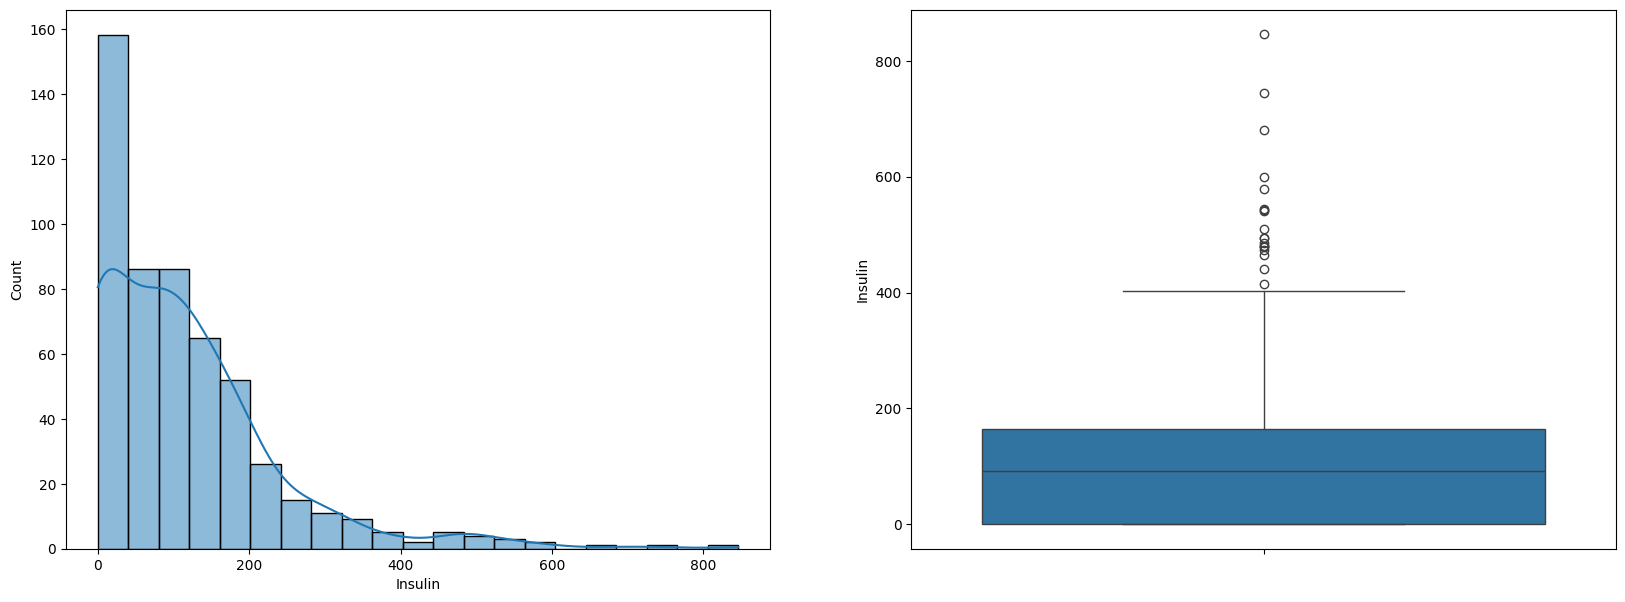

In [19]:
_, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.histplot(data=df, x="Insulin", kde=True, ax=ax[0])
sns.boxplot(data=df, y='Insulin', orient='v', ax=ax[1])
plt.show()

In [20]:
print(
    f"""
    Mean of Insulin: {df['Insulin'].mean()}
    Median of Insulin: {df['Insulin'].median()}
    Maximum of Insulin: {df['Insulin'].max()}
    Minimum of Insulin: {df['Insulin'].min()}
"""
)


    Mean of Insulin: 114.98872180451127
    Median of Insulin: 91.5
    Maximum of Insulin: 846
    Minimum of Insulin: 0



In [21]:
# outliers of Blood Pressure 
print(f"Women with Insulin level 0: {df[df['Insulin'] == 0].shape[0]}")

Women with Insulin level 0: 140


**Analysis of BMI:**

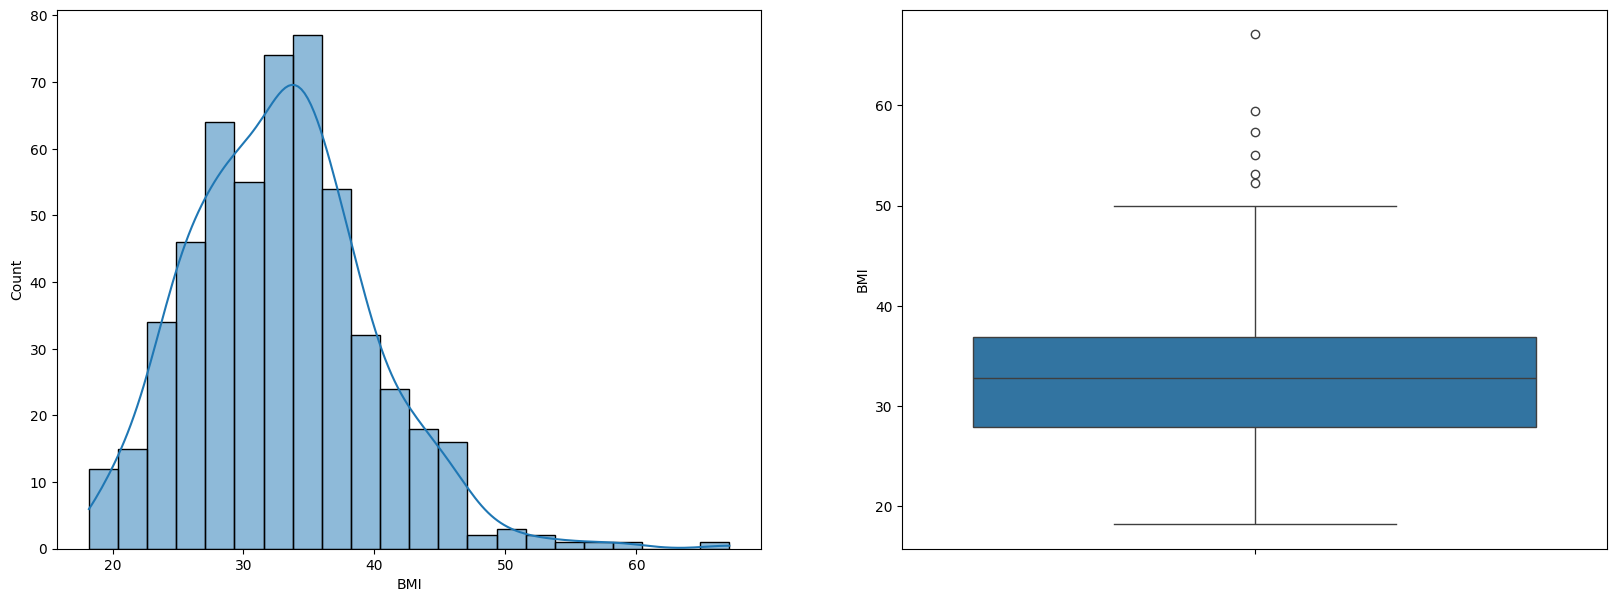

In [22]:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df, x="BMI", kde=True, ax=ax[0])
sns.boxplot(data=df, y="BMI", ax=ax[1], orient="v")
plt.show()

In [23]:
print(
    f"""
    Mean of BMI: {df['BMI'].mean()}
    Median of BMI: {df['BMI'].median()}
    Maximum of BMI: {df['BMI'].max()}
    Minimum of BMI: {df['BMI'].min()}
"""
)


    Mean of BMI: 32.89022556390977
    Median of BMI: 32.8
    Maximum of BMI: 67.1
    Minimum of BMI: 18.2



In [24]:
# outliers of Blood Pressure 
print(f"Women with BMI 0: {df[df['BMI'] == 0].shape[0]}")

Women with BMI 0: 0


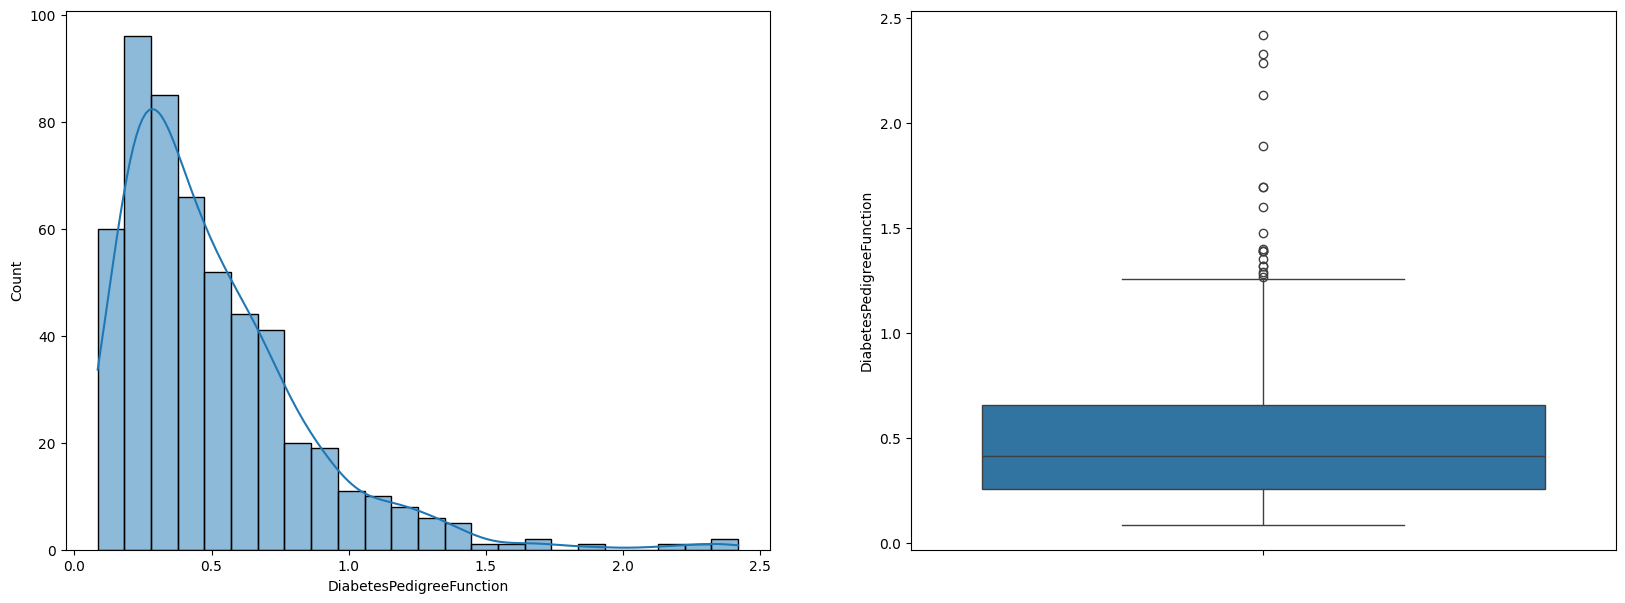

In [25]:
#Analysis of 
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax[0])
sns.boxplot(data=df, y="DiabetesPedigreeFunction", orient="v", ax=ax[1])
plt.show()

In [26]:
print(
    f"""
    Mean of DiabetesPedigreeFunction: {df['DiabetesPedigreeFunction'].mean()}
    Median of DiabetesPedigreeFunction: {df['DiabetesPedigreeFunction'].median()}
    Maximum of DiabetesPedigreeFunction: {df['DiabetesPedigreeFunction'].max()}
    Minimum of DiabetesPedigreeFunction: {df['DiabetesPedigreeFunction'].min()}
"""
)


    Mean of DiabetesPedigreeFunction: 0.5029661654135338
    Median of DiabetesPedigreeFunction: 0.416
    Maximum of DiabetesPedigreeFunction: 2.42
    Minimum of DiabetesPedigreeFunction: 0.085



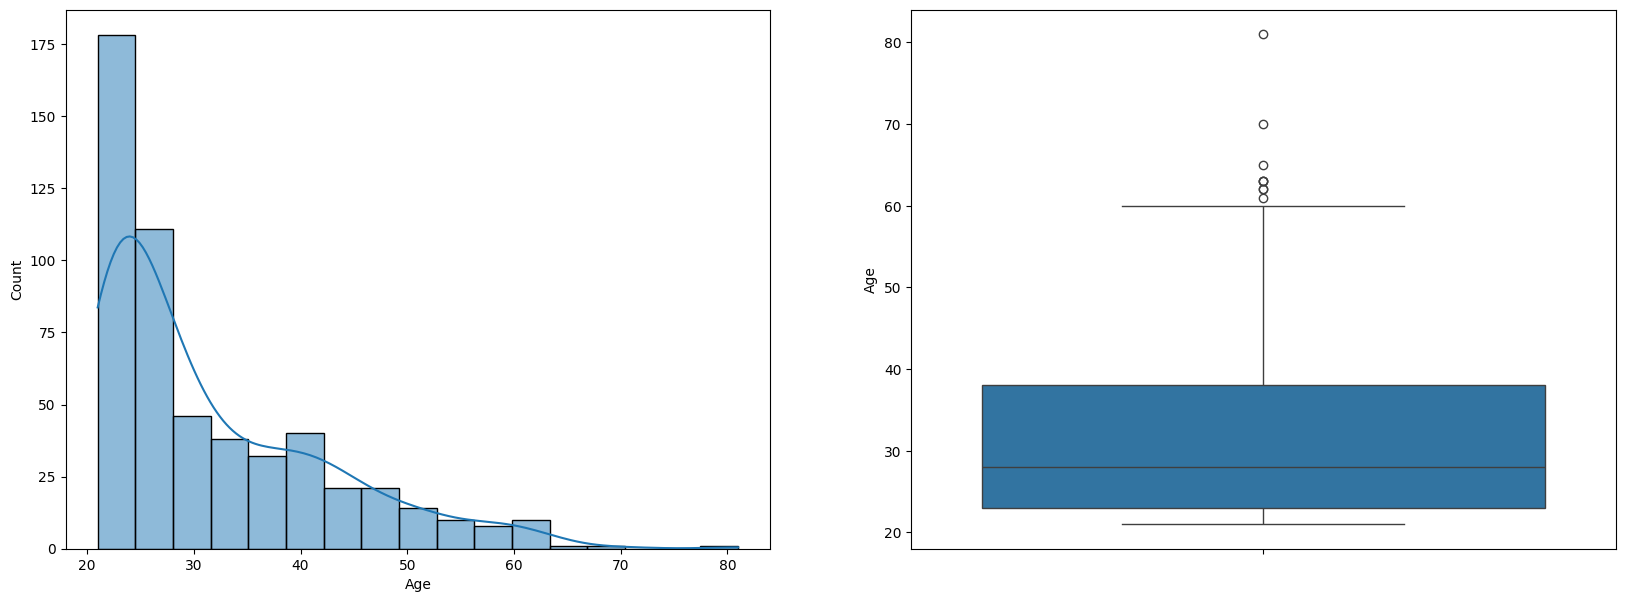

In [27]:
# Analysis of Age:
_, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(data=df, x="Age", kde=True, ax=ax[0])
sns.boxplot(data=df, y="Age", ax=ax[1], orient="v")
plt.show()

In [28]:
print(
    f"""
    Mean of Age: {df['Age'].mean()}
    Median of Age: {df['Age'].median()}
    Maximum of Age: {df['Age'].max()}
    Minimum of Age: {df['Age'].min()}
"""
)


    Mean of Age: 31.61466165413534
    Median of Age: 28.0
    Maximum of Age: 81
    Minimum of Age: 21



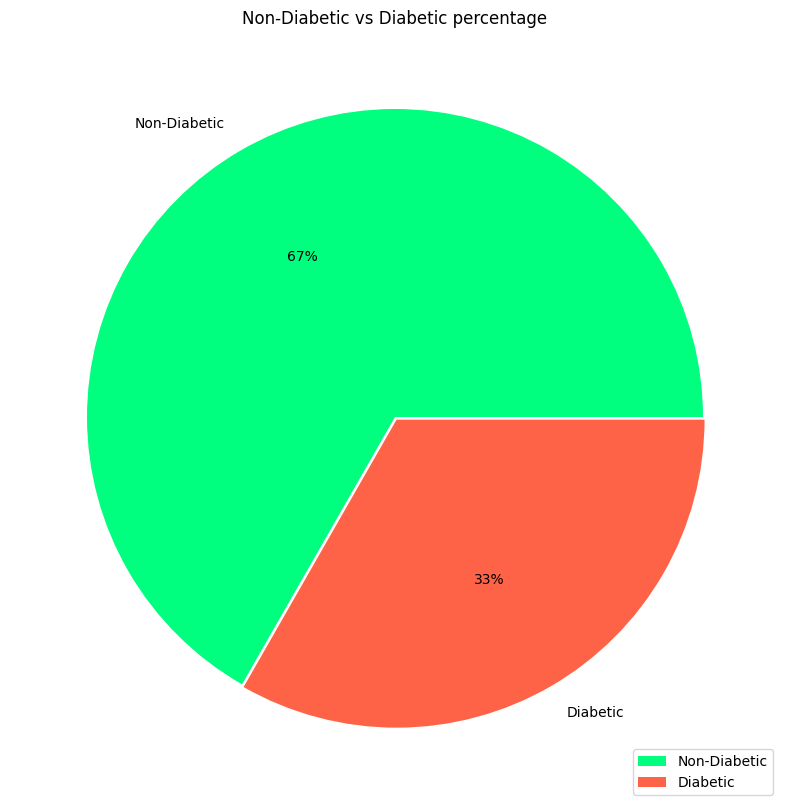

In [29]:
# Analysis of Outcome:
plt.figure(figsize=(10, 10))
labels = ["Non-Diabetic", "Diabetic"]

plt.pie(
    df["Outcome"].value_counts(),
    labels=labels,
    colors=["#00FF7F", "#FF6347"],
    explode=(0, 0.01),
    autopct="%1.0f%%",
)
plt.legend(loc="lower right", labels=labels)
plt.title("Non-Diabetic vs Diabetic percentage")
plt.show()

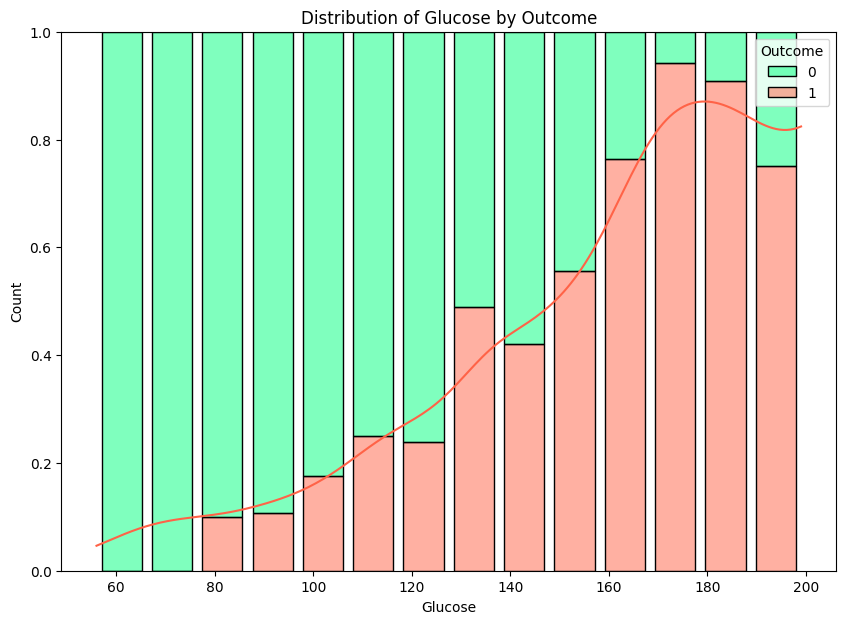

In [30]:
# Multivariate analysis between Glucose and Outcome:
plt.figure(figsize=(10, 7))
sns.histplot(
    data=df,
    x="Glucose",
    hue="Outcome",
    kde=True,
    multiple="fill",
    palette=["#00FF7F", "#FF6347"],
    shrink=0.8
)
plt.title("Distribution of Glucose by Outcome")
plt.show()

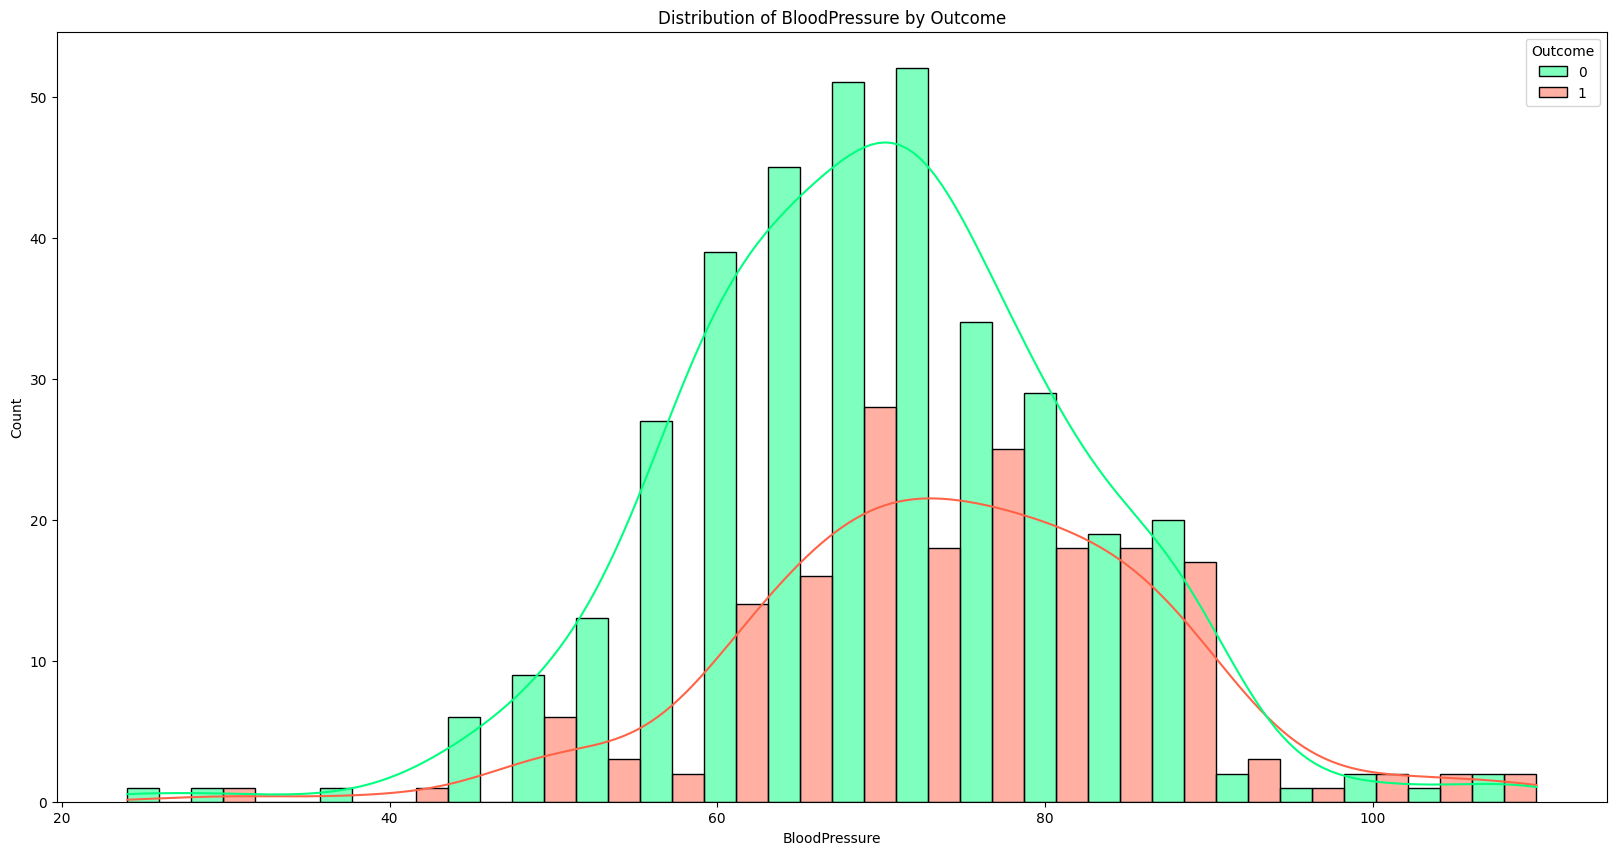

In [31]:
# Multivariate analysis between BloodPressure and Outcome:
plt.figure(figsize=(20, 10))
sns.histplot(
    data=df,
    x="BloodPressure",
    hue="Outcome",
    kde=True,
    multiple="dodge",
    palette=["#00FF7F", "#FF6347"],
)
plt.title("Distribution of BloodPressure by Outcome")
plt.show()

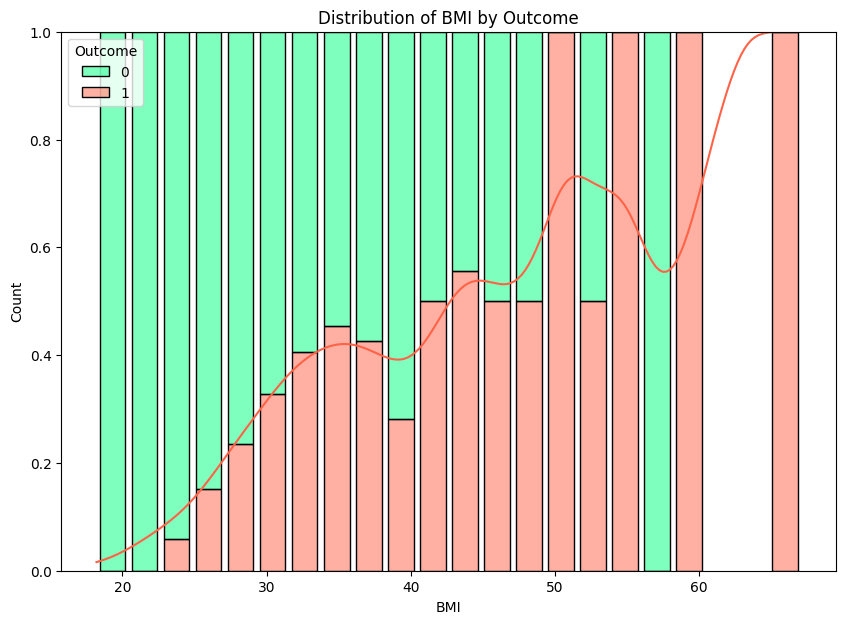

In [32]:
# Multivariate analysis between BMI and Outcome:
plt.figure(figsize=(10, 7))
sns.histplot(
    data=df,
    x="BMI",
    hue="Outcome",
    kde=True,
    multiple="fill",
    palette=["#00FF7F", "#FF6347"],
    shrink=0.8,
)
plt.title("Distribution of BMI by Outcome")
plt.show()

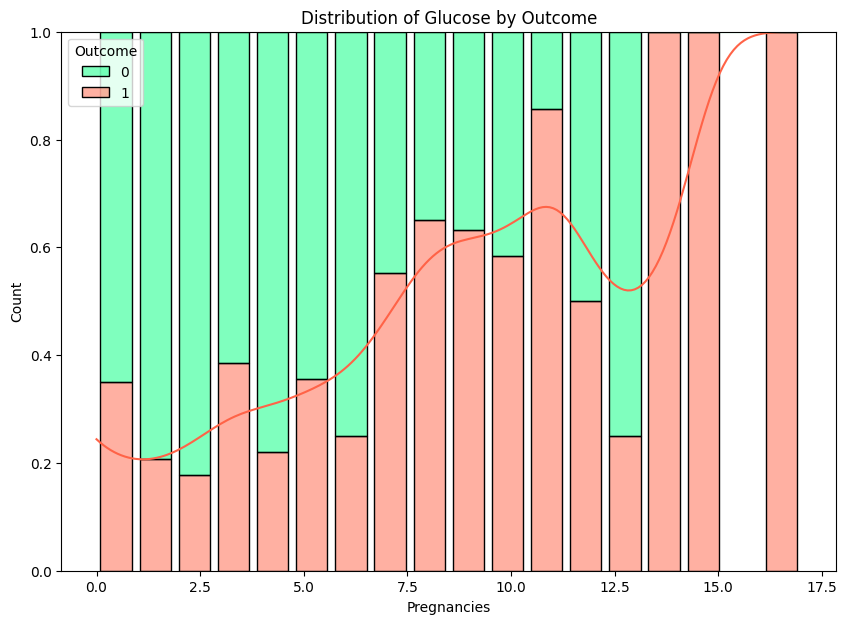

In [33]:
# Multivariate analysis between Pregnancies and Outcome:
plt.figure(figsize=(10, 7))
sns.histplot(
    data=df,
    x="Pregnancies",
    hue="Outcome",
    kde=True,
    multiple="fill",
    palette=["#00FF7F", "#FF6347"],
    shrink=0.8,
)
plt.title("Distribution of Glucose by Outcome")
plt.show()

In [34]:
#Correlation matrix:
correlation_matrix = df.corr()
correlation_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.503614
Age                         0.315097
BMI                         0.300901
SkinThickness               0.254874
Pregnancies                 0.252586
DiabetesPedigreeFunction    0.233074
Insulin                     0.212204
BloodPressure               0.183432
Name: Outcome, dtype: float64

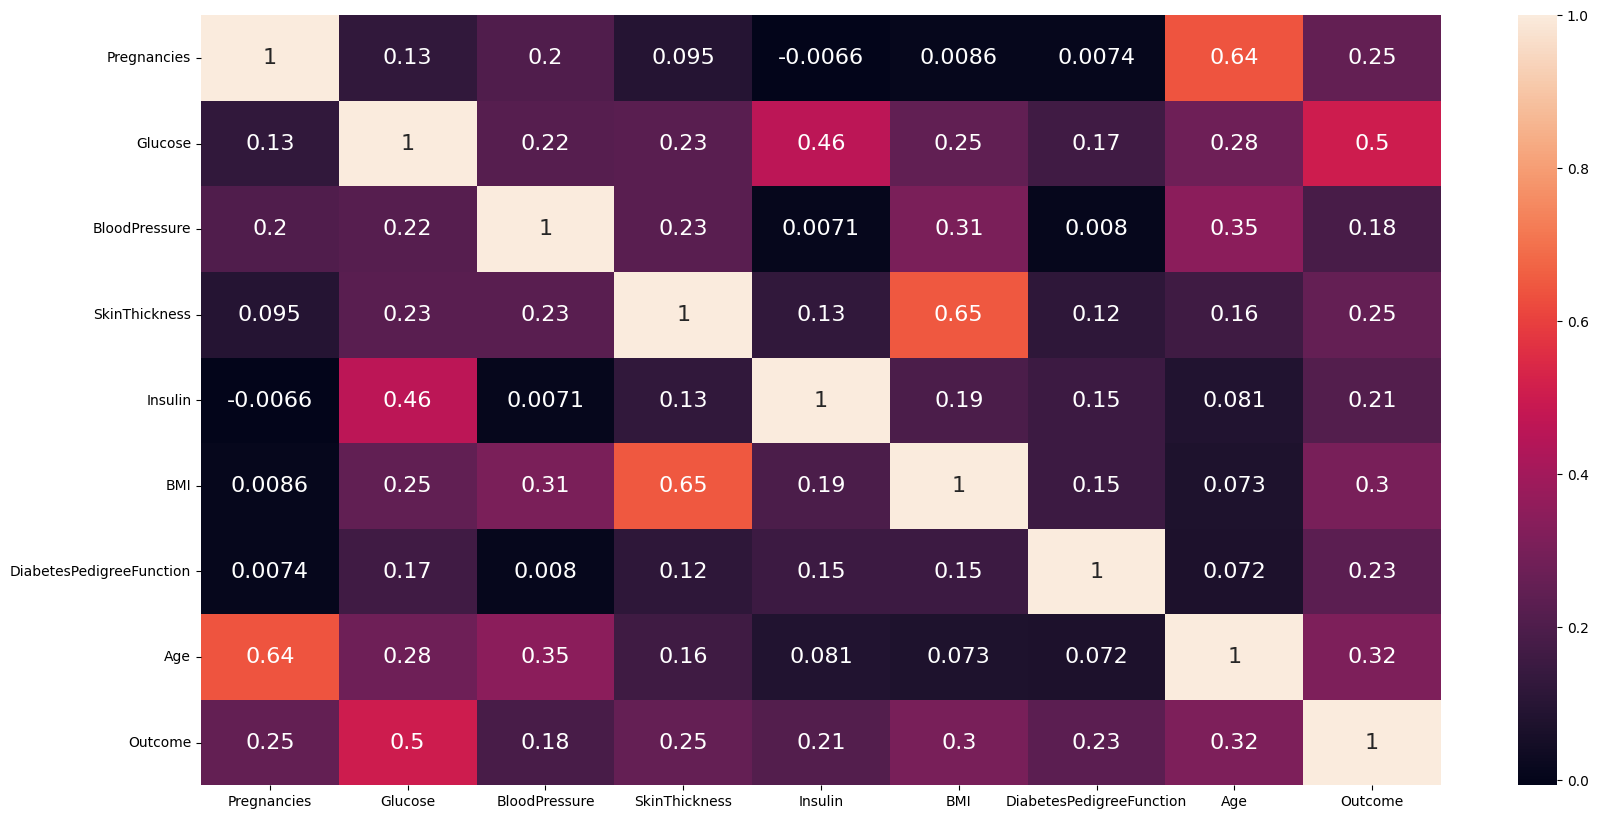

In [35]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    data=correlation_matrix, annot=True, linecolor="Black", annot_kws={"size": 16}
)
plt.show()

# Hierarchical Clustering Dendrogram

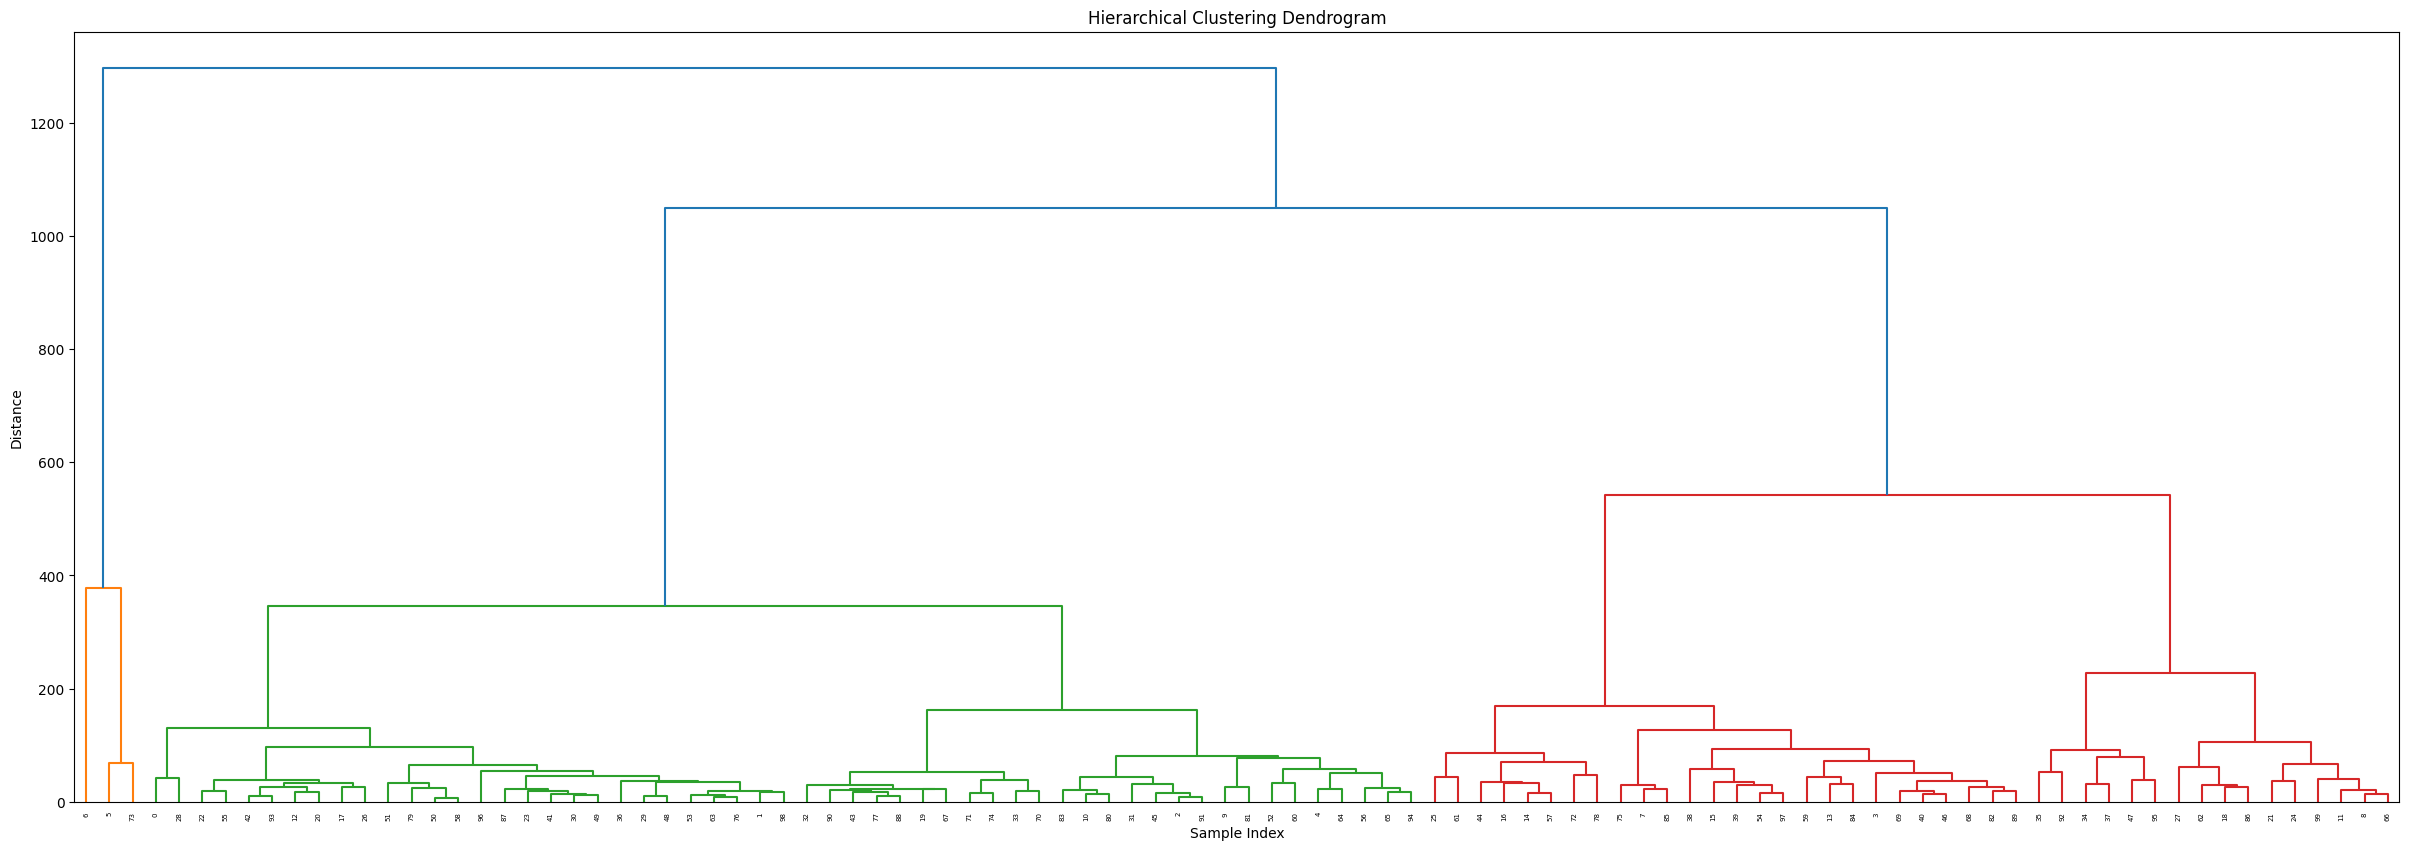

In [36]:
sample_data = df.iloc[:100 :]
Z = linkage(sample_data, 'ward')
#Visualization part
plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# K-Medoids Clustering on Diabetes Dataset

This notebook performs K-Medoids clustering on the diabetes dataset. The steps involved are as follows:

1. **Feature Selection**: Select the features to use for clustering. In this case, we’re using all the features in the dataset

In [37]:
# Select all the features for clustering
features=[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
df_scaled = df[features] 

# Normalize the data 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

**Perform K-Medoids Clustering**

In [38]:
# Compute the distance matrix
Dis = cdist(df_scaled, df_scaled)


# Determine the number of clusters and initial medoids
k = 3
initial_medoids = np.random.randint(0, len(df_scaled), k)

# Perform K-Medoids clustering
kmedoids_instance = kmedoids(Dis, initial_index_medoids=initial_medoids, data_type='distance_matrix')
kmedoids_instance.process() 

# Get the clusters
clusters = kmedoids_instance.get_clusters() 

# Create a new column in the dataframe for the cluster labels
df['Cluster'] = -1
for i, cluster in enumerate(clusters):
    df.iloc[cluster, df.columns.get_loc('Cluster')] = i


**Visualize the Clusters**

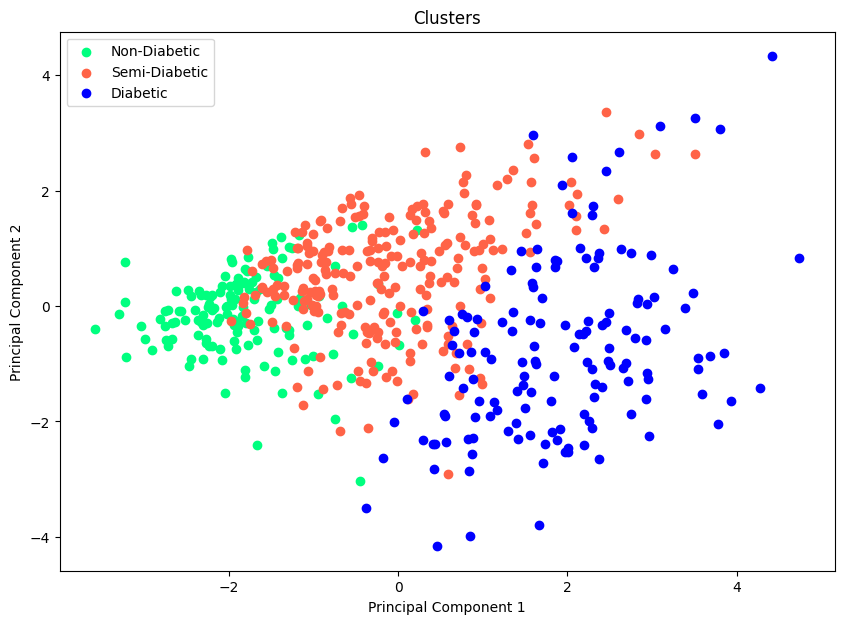

In [39]:
# Perform PCA for dimensionality reduction
# Princible component Analysis 
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Calculate the mean 'Outcome' for each cluster
cluster_means = { 
    0: df[df['Cluster'] == 0]['Outcome'].mean(),
    1: df[df['Cluster'] == 1]['Outcome'].mean(),
    2: df[df['Cluster'] == 2]['Outcome'].mean()
}

# Sort the clusters based on the mean 'Outcome'
sorted_clusters = sorted(cluster_means.items(), key=lambda item: item[1])

# Assign the labels to the clusters
labels = {
    sorted_clusters[0][0]: 'Non-Diabetic',
    sorted_clusters[1][0]: 'Semi-Diabetic',
    sorted_clusters[2][0]: 'Diabetic'
}

# Visualize the clusters with the new labels
plt.figure(figsize=(10, 7)) 
colors = ["#00FF7F", "#FF6347",'blue']  # Color scheme from cold to hot
for i in range(k):
    plt.scatter(df_pca[df['Cluster'] == i, 0], df_pca[df['Cluster'] == i, 1], color=colors[i], label=labels[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.legend()
plt.show()


**Analyze the Clusters**

In [40]:
# List of features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

# Calculate and print the mean of each feature for each labeled cluster
for cluster_number, label in labels.items():
    print(f"\n{label} Cluster:")
    for feature in features:
        mean_value = df[df['Cluster'] == cluster_number][feature].mean()
        print(f"Mean {feature} for {label} Cluster: {mean_value}") 




Non-Diabetic Cluster:
Mean Pregnancies for Non-Diabetic Cluster: 2.0492957746478875
Mean Glucose for Non-Diabetic Cluster: 102.09859154929578
Mean BloodPressure for Non-Diabetic Cluster: 64.0774647887324
Mean SkinThickness for Non-Diabetic Cluster: 18.781690140845072
Mean Insulin for Non-Diabetic Cluster: 73.05633802816901
Mean BMI for Non-Diabetic Cluster: 26.03591549295775
Mean DiabetesPedigreeFunction for Non-Diabetic Cluster: 0.498612676056338
Mean Age for Non-Diabetic Cluster: 25.288732394366196
Mean Outcome for Non-Diabetic Cluster: 0.06338028169014084

Semi-Diabetic Cluster:
Mean Pregnancies for Semi-Diabetic Cluster: 2.54320987654321
Mean Glucose for Semi-Diabetic Cluster: 116.4074074074074
Mean BloodPressure for Semi-Diabetic Cluster: 72.17695473251028
Mean SkinThickness for Semi-Diabetic Cluster: 33.10288065843621
Mean Insulin for Semi-Diabetic Cluster: 117.76954732510288
Mean BMI for Semi-Diabetic Cluster: 35.850205761316865
Mean DiabetesPedigreeFunction for Semi-Diabetic C

# Please note that :
   The semi-Diabetic cluster is particularly critical, as it encompasses individuals who are diabetic as well as those on the cusp of diabetes. For the latter group, it represents a crucial juncture—a final opportunity to adopt a healthier lifestyle to avoid the irreversible onset of diabetes.
